In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!pip install keras-rmsprop

E: Package 'libfluidsynth1' has no installation candidate
ERROR: Could not find a version that satisfies the requirement keras-rmsprop (from versions: none)
ERROR: No matching distribution found for keras-rmsprop


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# we need to fit model with sequence of tokens with specific length
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
# normal LSTM/GRU and the Version with Cuda
from keras.layers import Dense, Embedding, GRU, LSTM, Dropout, Bidirectional
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop
from keras.optimizers import Adam

# keras wrapper for k-fold cross-validation
!pip install keras-scikit-learn
#from keras.wrappers.scikit_learn import KerasClassifier
# normsl cross validation
from sklearn.model_selection import cross_val_score, train_test_split
# cross validation for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import os


# Any results you write to the current directory are saved as output.

ERROR: Could not find a version that satisfies the requirement keras-scikit-learn (from versions: none)
ERROR: No matching distribution found for keras-scikit-learn


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from nltk import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix, classification_report

from keras.models import Model, load_model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [ ]:
datal = pd.DataFrame(pd.read_excel('/content/drive/MyDrive/camerounaise_spam_data.xlsx'))
#datal = datal = pd.read_csv('/content/drive/MyDrive/smsspamcollection/spam.csv',encoding='latin-1')

scale_mapped={
    'Spam':1.0,
    'spam':1.0,
    'ham':0.0,
    'h':0.0
}

datal.rename(columns = {'v1':'label','v2':'SMS'},inplace=True)
# Checking the rows and columns(m*n)
data = (datal[['label','SMS']].dropna().reset_index(drop=True)).sample(frac = 1)
data_label= data['label'].replace(scale_mapped)
print(len(data))
# Checking for the nulls
data.info()
# Re-Checking for nulls
data.isnull().sum()
# Row-wise all values are displayed
data.values


20616
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20616 entries, 5723 to 15611
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   20616 non-null  object
 1   SMS     20616 non-null  object
dtypes: object(2)
memory usage: 483.2+ KB


array([['ham', 'Okay merci délégué...\n'],
       ['ham', "Quelqu'un peut-il m'aider ici??"],
       ['ham', 'Kimmich et mérinos sont ou?'],
       ...,
       ['spam',
        "Yoomee CAmeroun 44Go de données gratuites (tous les réseaux) valables pendant 90 jours à l'occasion de la célébration de l'anniversaire de WhatsApp. \nJ'ai reçu le mien aujourd'hui. \nOuvrir ce lien \neianal.com/whatsapp/fr \neianal.com/whatsapp/fr"],
       ['ham',
        'You have successfully withdrawn FCFA 9500 from your mobile money account, from GUEMKAP WANDJI JOSEPH -LMJ (237651406187) on 2021-08-20 09:15:49. Fees: FCFA 175; Transaction Id: 2882341684. New balance: FCFA 345.'],
       ['ham', 'Bonsoir madame']], dtype=object)

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


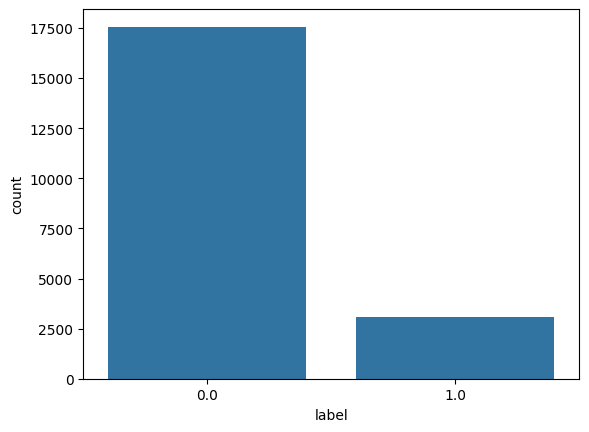

In [ ]:

sns.countplot(x=data_label)
plt.show()


In [ ]:
#l_2024_Y_2023
spam = 0
ham = 0
taille=20616
for e in data_label:
  if e == 1.0:
    spam +=1
  else:
    ham +=1
print(ham + spam)
print(spam/taille)
print(ham/taille)
print(spam)
print(ham)

20616
0.14818587504850603
0.851814124951494
3055
17561


In [ ]:
# Libraries needed for NLP
import nltk
import re

# Stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Stemmers
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

# Lemmatizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 520.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199775 sha256=b11c152af06966c5370743f9d257361831ec826f65f5ffb86d0fcecddfc61aea
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import fasttext

PRETRAINED_MODEL_PATH = '/content/drive/MyDrive/fastext/lid.176.bin'
model_fastext = fasttext.load_model(PRETRAINED_MODEL_PATH)


In [ ]:
data_sms = []
text = []
# Store it in a variable
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
# Cleanup
# Store it in a variable
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def clean_data_en(text):
  '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
  # replace email address with 'emailaddress'
  text = re.sub('([A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,})', r'emailadress', str(text))
  # replace urls with 'webaddress'
  text = re.sub('(https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r'webaddress', str(text))
  # replace 10 digit phone number with 'phone-number'
  text =  re.sub('(?:\d{8}(?:\d{2}(?:\d{2})?)?|\(\+?\d{2,3}\)\s?(?:\d{4}[\s*.-]?\d{4}|\d{3}[\s*.-]?\d{3}|\d{2}([\s*.-]?)\d{2}\1\d{2}(?:\1\d{2})?))', r'phone-number', text)
  # replace normal number with 'number'
  text = re.sub('\d+(\.\d+)?', r'number', text)
  # remove punctuation
  text=re.sub('[^\w\d\s]', r' ',text)
  # remove whitespace between terms with single space
  text = re.sub('\s+', r' ', text)
  # remove leading and trailing whitespace
  text = re.sub('^\s+|\s*?$', r' ',text)
  # change words to lower case
  text = re.sub('(https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r' url', text)
  text = re.sub('(00237[1-9] *[0-9]{8}|\+237[1-9] *[0-9]{8}|(237[1-9] *[0-9]{8})|(6[2|3|5-9] *[0-9]{7}))', r' phoneNumber', text)
  text = re.sub('(?:\d{8}(?:\d{2}(?:\d{2})?)?|\(\+?\d{2,3}\)\s?(?:\d{4}[\s*.-]?\d{4}|\d{3}[\s*.-]?\d{3}|\d{2}([\s*.-]?)\d{2}\1\d{2}(?:\1\d{2})?))', r' phoneNumber', text)
  text = re.sub('[\d]{1,10}fcfa|[\d]{1,10}FCFA|[\d]{1,10}Fr|[\d]{1,10}fr|[\d]{1,10}FCFA|[\d]{1,10} fcfa|[\d]{1,10} FCFA|[\d]{1,10} Fr|[\d]{1,10} fr', r' money', text)
  text = re.sub('[\d]{1,10}GO|[\d]{1,10}Go|[\d]{1,10}gO|[\d]{1,10}go|[\d]{1,10} GO|[\d]{1,10} Go|[\d]{1,10} gO|[\d]{1,10} go', r' dataConnexion', text)
  text = re.sub('([http//[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)| (https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)|(www.https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)|(www.http//[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r' adressWeb', text)
  text = text.lower()
  return text

def clean_data_fr(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
      and remove words containing numbers.'''
    # replace email address with 'emailaddress'
    text = re.sub('([A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,})', r'adresseemail', str(text))
    # replace urls with 'webaddress'
    text = re.sub('(https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r'adresseweb', str(text))
    # replace 10 digit phone number with 'phone-number'
    text =  re.sub('(?:\d{8}(?:\d{2}(?:\d{2})?)?|\(\+?\d{2,3}\)\s?(?:\d{4}[\s*.-]?\d{4}|\d{3}[\s*.-]?\d{3}|\d{2}([\s*.-]?)\d{2}\1\d{2}(?:\1\d{2})?))', r'phone-number', text)
    # replace normal number with 'number'
    text = re.sub('\d+(\.\d+)?', r'numero', text)
    # remove punctuation
    text=re.sub('[^\w\d\s]', r' ',text)
    # remove whitespace between terms with single space
    text = re.sub('\s+', r' ', text)
    # remove leading and trailing whitespace
    text = re.sub('^\s+|\s*?$', r' ',text)
    # change words to lower case
    text = re.sub('(https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r' url', text)
    text = re.sub('(00237[1-9] *[0-9]{8}|\+237[1-9] *[0-9]{8}|(237[1-9] *[0-9]{8})|(6[2|3|5-9] *[0-9]{7}))', r' numero_telephone', text)
    text = re.sub('(?:\d{8}(?:\d{2}(?:\d{2})?)?|\(\+?\d{2,3}\)\s?(?:\d{4}[\s*.-]?\d{4}|\d{3}[\s*.-]?\d{3}|\d{2}([\s*.-]?)\d{2}\1\d{2}(?:\1\d{2})?))', r' numeroTelephone', text)
    text = re.sub('[\d]{1,10}fcfa|[\d]{1,10}FCFA|[\d]{1,10}Fr|[\d]{1,10}fr|[\d]{1,10}FCFA|[\d]{1,10} fcfa|[\d]{1,10} FCFA|[\d]{1,10} Fr|[\d]{1,10} fr', r' argent', text)
    text = re.sub('[\d]{1,10}GO|[\d]{1,10}Go|[\d]{1,10}gO|[\d]{1,10}go|[\d]{1,10} GO|[\d]{1,10} Go|[\d]{1,10} gO|[\d]{1,10} go', r' donneeInternet', text)
    text = re.sub('([http//[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)| (https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)|(www.https://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)|(www.http//[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$)', r' adresseWeb', text)
    text = text.lower()
    return text


In [ ]:
    from nltk.corpus import stopwords

    more_stopwords = ['u', 'im', 'c']
    englishStopWord = stopwords.words("english")
    frenchStopWord = stopwords.words("french")
    englishStopWord = stopwords.words("english") + more_stopwords
    french_english =  englishStopWord +frenchStopWord
    def testFuncOld(text):
        text = ' '.join([word for word in text.split() if word not in englishStopWord])
        return text

    def testFrenchEnglish(text):
        text = ' '.join([word for word in text.split() if word not in french_english])
        return text

    def testFuncNew(text):
        text = ' '.join([word for word in text.split() if word not in text])
        return text

        #remove french stop wo13/02/2023, 09:54 - +237 99824722: rd
    def testFuncOldFrench(text):
        text = ' '.join([word for word in text.split() if word not in stopwords.words("french")])
        return text

    def testFuncNewFrench(text):
        text = ' '.join([word for word in text.split() if word not in text])
        return text

    def eliminer(text):
      text = str(text).replace('\n', ' ')
      predictions = model_fastext.predict(text)
      if predictions[0][0] == '__label__fr':
        text = clean_data_fr(text)
        text = testFuncOldFrench(text)
      elif predictions[0][0] == '__label__en':
        text = clean_data_en(text)
        text = testFuncOld(text)
      else:
        clean_data_en(text)
        text = clean_data_fr(text)
        text = testFrenchEnglish(text)
      return text


In [ ]:
data['SMS']= data['SMS'].apply(eliminer)

In [ ]:
y = data_label

print(max(len(s) for s in data['SMS']))
print(min(len(s)for s in data['SMS']))
sorted_X = sorted(len(s) for s in data['SMS'])
print(sorted_X[len(sorted_X) // 2])


1117
0
37


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['SMS'])
sequences = tokenizer.texts_to_sequences(data['SMS'])

vocab_size = len(tokenizer.word_index)+1
print(vocab_size)

16205


In [ ]:
# divide sum of length of all sequences by number of all sequences to find averge length of each sequence
sum([len(x) for x in sequences]) // len(sequences)

9

In [ ]:
pad = 'post'
max_len = 37
embedding_size = 100
batch_size = 20
sequences = pad_sequences(sequences, maxlen=max_len, padding=pad, truncating=pad)
sequences.shape

X_train, X_test, y_train, y_test = train_test_split(sequences, y, test_size = 0.2, random_state= 0)

In [ ]:
print(len(y_test))

4124


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
model.add(Dropout(0.8))
model.add(LSTM(140, return_sequences=False))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid', name='Classification'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 100)           1620500   
                                                                 
 dropout (Dropout)           (None, 37, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 140)               134960    
                                                                 
 dropout_1 (Dropout)         (None, 140)               0         
                                                                 
 Classification (Dense)      (None, 1)                 141       
                                                                 
Total params: 1755601 (6.70 MB)
Trainable params: 1755601 (6.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#save_best = ModelCheckpoint('SpamDetection.hdf', save_best_only=True, monitor='val_acc', mode='max')
# callback_early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
# Uses Automatic Verification Datasets (fastest option)
# model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.1, callbacks=[callback_early_stopping])
n_epochs = 10
results = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

Epoch 1/10
660/660 [==============================] - 63s 92ms/step - loss: 0.1571 - accuracy: 0.9554 - val_loss: 0.0794 - val_accuracy: 0.9673
Epoch 2/10
660/660 [==============================] - 65s 99ms/step - loss: 0.0461 - accuracy: 0.9886 - val_loss: 0.0454 - val_accuracy: 0.9894
Epoch 3/10
660/660 [==============================] - 63s 95ms/step - loss: 0.0311 - accuracy: 0.9919 - val_loss: 0.0745 - val_accuracy: 0.9864
Epoch 4/10
660/660 [==============================] - 63s 95ms/step - loss: 0.1166 - accuracy: 0.9785 - val_loss: 0.1072 - val_accuracy: 0.9770
Epoch 5/10
660/660 [==============================] - 61s 93ms/step - loss: 0.1005 - accuracy: 0.9807 - val_loss: 0.1082 - val_accuracy: 0.9703
Epoch 6/10
660/660 [==============================] - 61s 92ms/step - loss: 0.0934 - accuracy: 0.9805 - val_loss: 0.1057 - val_accuracy: 0.9733
Epoch 7/10
660/660 [==============================] - 65s 99ms/step - loss: 0.0687 - accuracy: 0.9871 - val_loss: 0.0490 - val_accuracy:

In [ ]:
model.summary()
print(results)
loss, accuracy = model.evaluate(X_train , y_train , verbose=False)
#print("************************Results for class :"+str(curr_class)+"*********************")
print("Training Accuracy: {:.8f}".format(accuracy))
print("ok")
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.8f}".format(accuracy))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 100)           1620500   
                                                                 
 dropout (Dropout)           (None, 37, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 140)               134960    
                                                                 
 dropout_1 (Dropout)         (None, 140)               0         
                                                                 
 Classification (Dense)      (None, 1)                 141       
                                                                 
Total params: 1755601 (6.70 MB)
Trainable params: 1755601 (6.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training Accuracy:

In [ ]:
# model.load_weights(filepath='SpamDetection.hdf')
import numpy as np
from tensorflow import keras
X_test = np.array(X_test)
y_test = np.array(y_test)
eval_ = model.evaluate(X_test, y_test)
print(eval_[0], eval_[1]) # loss / accuracy

129/129 [==============================] - 4s 29ms/step - loss: 0.0462 - accuracy: 0.9888
0.046173423528671265 0.9888457655906677


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : {:.7f}"+ str(format(acc_sc)))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [ ]:
preds = (model.predict(X_test) > 0.5).astype("int32")

129/129 [==============================] - 3s 22ms/step


In [ ]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3481
         1.0       0.96      0.97      0.96       643

    accuracy                           0.99      4124
   macro avg       0.98      0.98      0.98      4124
weighted avg       0.99      0.99      0.99      4124

Accuracy : {:.7f}0.9888457807953444


0.9888457807953444

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=5b8b2fd8d124ef930fb1fda10fe0fc335243f49e92e21e2bec0e8b774b8688ba
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


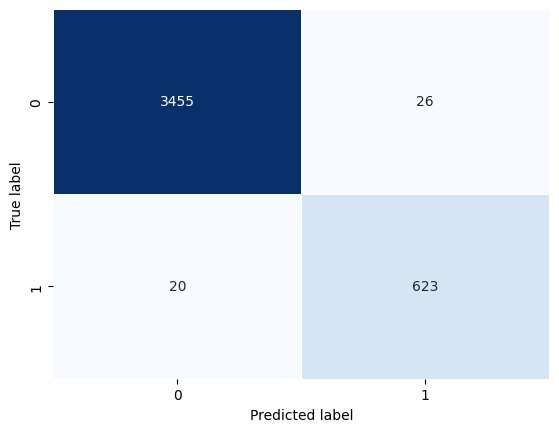

In [ ]:
import pandas as pd # Pour l'analyse et le traitement des données
import numpy as np # Pour le calcul numerique
import matplotlib.pyplot as plt # Pour la visualisation
import seaborn as sns # Pour la visualisation
from sklearn.cluster import KMeans # Pour la création du model
!pip install langdetect
from langdetect import detect
np.set_printoptions(precision=8)
plot_confusion_matrix(y_test, preds)

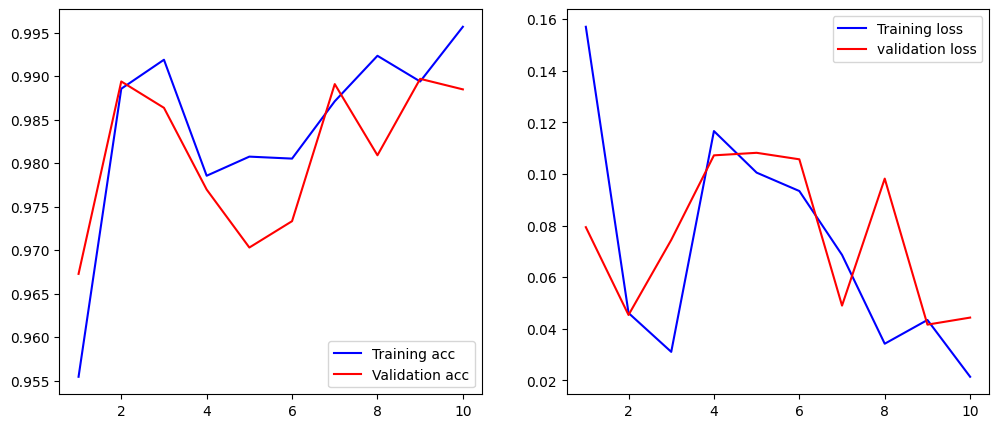

In [ ]:
import matplotlib.pyplot as plt
from keras.callbacks import History

def plot_model(result):
    acc = result.history['accuracy']
    val_acc = result.history['val_accuracy']
    loss = result.history['loss']
    val_loss = result.history['val_loss']
    x = range(1, len(acc)+1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label= 'Validation acc')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='validation loss')
    plt.legend()

plot_model(results)

Modele de GRU

In [ ]:
model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
model1.add(Dropout(0.8))
model1.add(GRU(140, return_sequences=False))
model1.add(Dropout(0.86))
model1.add(Dense(1, activation='sigmoid', name='Classification'))
model1.summary()

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
results1 = model1.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2)

eval_ = model1.evaluate(X_test, y_test)
print(eval_[0], eval_[1]) # loss / accuracy



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 100)           1620500   
                                                                 
 dropout_2 (Dropout)         (None, 25, 100)           0         
                                                                 
 gru (GRU)                   (None, 140)               101640    
                                                                 
 dropout_3 (Dropout)         (None, 140)               0         
                                                                 
 Classification (Dense)      (None, 1)                 141       
                                                                 
Total params: 1722281 (6.57 MB)
Trainable params: 1722281 (6.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
660/6

Evaluation du modele GRU

In [ ]:
model1.summary()
print(results1)
loss, accuracy = model1.evaluate(X_train , y_train , verbose=False)
#print("************************Results for class :"+str(curr_class)+"*********************")
print("Training Accuracy: {:.8f}".format(accuracy))
print("ok")
loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.8f}".format(accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 100)           1620500   
                                                                 
 dropout_2 (Dropout)         (None, 25, 100)           0         
                                                                 
 gru (GRU)                   (None, 140)               101640    
                                                                 
 dropout_3 (Dropout)         (None, 140)               0         
                                                                 
 Classification (Dense)      (None, 1)                 141       
                                                                 
Total params: 1722281 (6.57 MB)
Trainable params: 1722281 (6.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Training Accurac

In [ ]:
# model.load_weights(filepath='SpamDetection.hdf')
import numpy as np
from tensorflow import keras
X_test = np.array(X_test)
y_test = np.array(y_test)
eval_ = model1.evaluate(X_test, y_test)
print(eval_[0], eval_[1]) # loss / accuracy

129/129 [==============================] - 2s 13ms/step - loss: 0.0464 - accuracy: 0.9884
0.04641902074217796 0.9883608222007751


Fonction pour préparer la matrice de confusion

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : {:.7f}"+ str(format(acc_sc)))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

Evaluation proprement dite

In [ ]:
preds = (model1.predict(X_test) > 0.5).astype("int32")

129/129 [==============================] - 2s 12ms/step


calcul de précision, rappel, f mesure pour chaque classe

In [ ]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3553
         1.0       0.93      0.99      0.96       571

    accuracy                           0.99      4124
   macro avg       0.97      0.99      0.98      4124
weighted avg       0.99      0.99      0.99      4124

Accuracy : {:.7f}0.988360814742968


0.988360814742968

Affichage de la matrice de confusion du modele

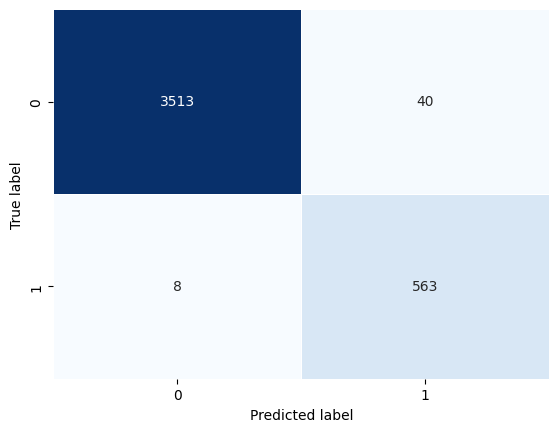

In [ ]:
import pandas as pd # Pour l'analyse et le traitement des données
import numpy as np # Pour le calcul numerique
import matplotlib.pyplot as plt # Pour la visualisation
import seaborn as sns # Pour la visualisation
from sklearn.cluster import KMeans # Pour la création du model
!pip install langdetect
from langdetect import detect
np.set_printoptions(precision=8)
plot_confusion_matrix(y_test, preds)

Courbe des erreurs

In [ ]:
plot_model(results1)

Entrainement du modele BiLSTM

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 37, 100)           1620500   
                                                                 
 dropout_4 (Dropout)         (None, 37, 100)           0         
                                                                 
 bidirectional (Bidirection  (None, 280)               269920    
 al)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 280)               0         
                                                                 
 Classification (Dense)      (None, 1)                 281       
                                                                 
Total params: 1890701 (7.21 MB)
Trainable params: 1890701 (7.21 MB)
Non-trainable params: 0 (0.00 Byte)
________________

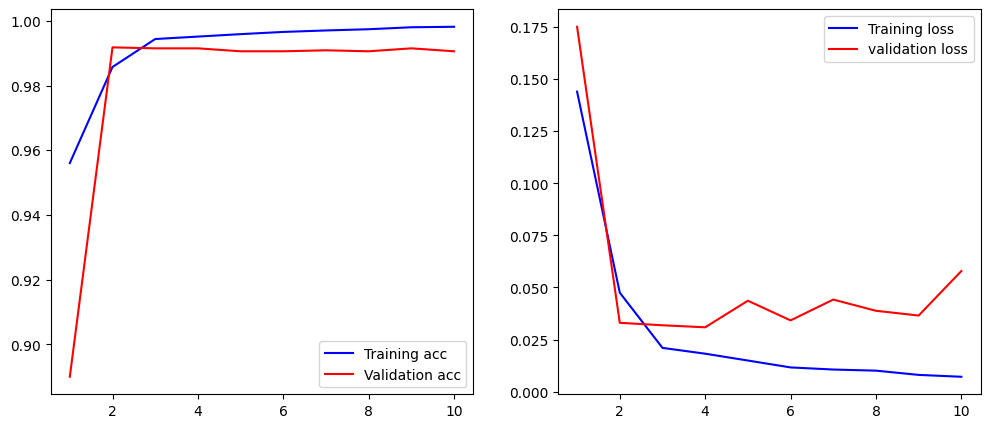

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
model2.add(Dropout(0.8))
model2.add(Bidirectional(LSTM(140, return_sequences=False)))
model2.add(Dropout(0.8))
model2.add(Dense(1, activation='sigmoid', name='Classification'))
model2.summary()

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

results2 = model2.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2)

eval_ = model2.evaluate(X_test, y_test)
print(eval_[0], eval_[1]) # loss / accuracy

plot_model(results2)

Résumer du modele

In [ ]:
model2.summary()
print(results2)
loss, accuracy = model2.evaluate(X_train , y_train , verbose=False)
#print("************************Results for class :"+str(curr_class)+"*********************")
print("Training Accuracy: {:.8f}".format(accuracy))
print("ok")
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.8f}".format(accuracy))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 37, 100)           1620500   
                                                                 
 dropout_4 (Dropout)         (None, 37, 100)           0         
                                                                 
 bidirectional (Bidirection  (None, 280)               269920    
 al)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 280)               0         
                                                                 
 Classification (Dense)      (None, 1)                 281       
                                                                 
Total params: 1890701 (7.21 MB)
Trainable params: 1890701 (7.21 MB)
Non-trainable params: 0 (0.00 Byte)
________________

Résultat du modele

In [ ]:
# model.load_weights(filepath='SpamDetection.hdf')
import numpy as np
from tensorflow import keras
X_test = np.array(X_test)
y_test = np.array(y_test)
eval_ = model2.evaluate(X_test, y_test)
print(eval_[0], eval_[1]) # loss / accuracy

129/129 [==============================] - 6s 46ms/step - loss: 0.0470 - accuracy: 0.9920
0.04695490002632141 0.9919980764389038


Préparation de la matrice de confusion du modele

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : {:.7f}"+ str(format(acc_sc)))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

Tester le modele ou encore évaluation du test

In [ ]:
preds = (model2.predict(X_test) > 0.5).astype("int32")

129/129 [==============================] - 6s 37ms/step


In [ ]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3502
         1.0       0.97      0.97      0.97       622

    accuracy                           0.99      4124
   macro avg       0.98      0.98      0.98      4124
weighted avg       0.99      0.99      0.99      4124

Accuracy : {:.7f}0.9919980601357905


0.9919980601357905

Affichage de la matrice de confusion

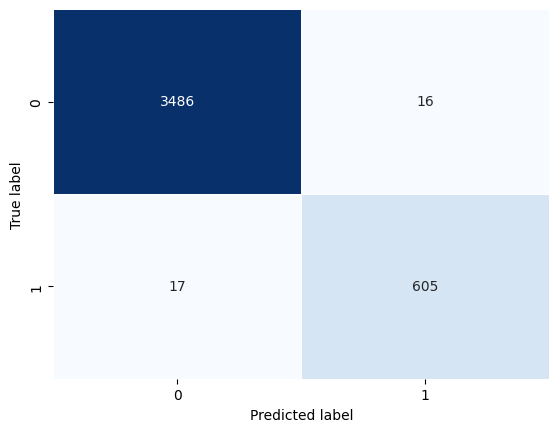

In [ ]:
import pandas as pd # Pour l'analyse et le traitement des données
import numpy as np # Pour le calcul numerique
import matplotlib.pyplot as plt # Pour la visualisation
import seaborn as sns # Pour la visualisation
from sklearn.cluster import KMeans # Pour la création du model
!pip install langdetect
from langdetect import detect
np.set_printoptions(precision=8)
plot_confusion_matrix(y_test, preds)

Courbe des erreurs

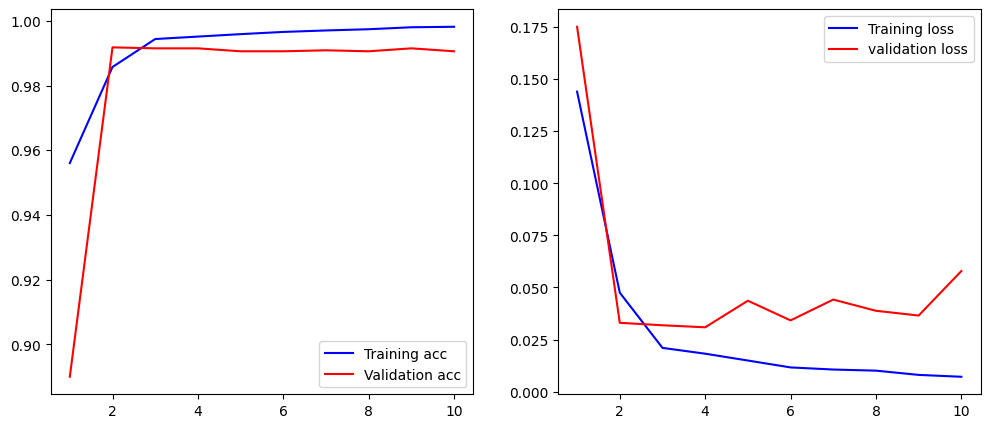

In [ ]:
plot_model(results2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 37, 100)           1620500   
                                                                 
 conv1d (Conv1D)             (None, 35, 128)           38528     
                                                                 
 max_pooling1d (MaxPooling1  (None, 11, 128)           0         
 D)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 11, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 128)            49280     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                      

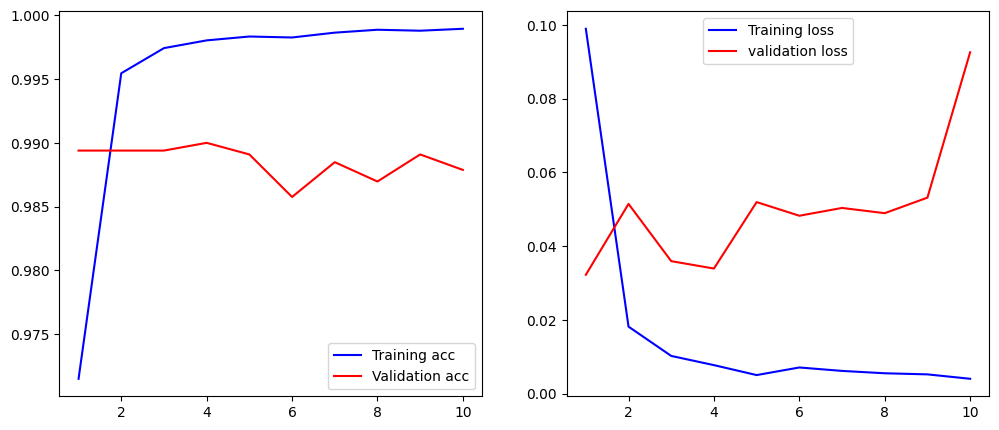

In [ ]:
from keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D

n_epochs = 10
model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
model3.add(Conv1D(128, 3, activation='relu'))
model3.add(MaxPool1D(3))
model3.add(Dropout(0.2))
model3.add(Conv1D(128, 3, activation='relu'))
model3.add(GlobalMaxPooling1D())
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.2))
model3.summary()
model3.add(Dense(1, activation='sigmoid'))


model3.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
result3 = model3.fit(X_train, y_train, batch_size = batch_size, epochs=n_epochs, validation_split=0.2, verbose=1)
eval_ = model3.evaluate(X_test, y_test)
print(eval_[0], eval_[1]) # loss / accuracy

plot_model(result3)

In [ ]:
model3.summary()
loss, accuracy = model3.evaluate(X_train , y_train , verbose=False)
#print("************************Results for class :"+str(curr_class)+"*********************")
print("Training Accuracy: {:.8f}".format(accuracy))
print("ok")
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.8f}".format(accuracy))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 37, 100)           1620500   
                                                                 
 conv1d (Conv1D)             (None, 35, 128)           38528     
                                                                 
 max_pooling1d (MaxPooling1  (None, 11, 128)           0         
 D)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 11, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 128)            49280     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                      

In [ ]:
# model.load_weights(filepath='SpamDetection.hdf')
import numpy as np
from tensorflow import keras
X_test = np.array(X_test)
y_test = np.array(y_test)
eval_ = model3.evaluate(X_test, y_test)
print(eval_[0], eval_[1]) # loss / accuracy

129/129 [==============================] - 1s 9ms/step - loss: 0.1061 - accuracy: 0.9879
0.10608808696269989 0.9878758192062378


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : {:.7f}"+ str(format(acc_sc)))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [ ]:
preds = (model3.predict(X_test) > 0.5).astype("int32")

129/129 [==============================] - 1s 6ms/step


In [ ]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3502
         1.0       0.95      0.97      0.96       622

    accuracy                           0.99      4124
   macro avg       0.97      0.98      0.98      4124
weighted avg       0.99      0.99      0.99      4124

Accuracy : {:.7f}0.9878758486905916


0.9878758486905916

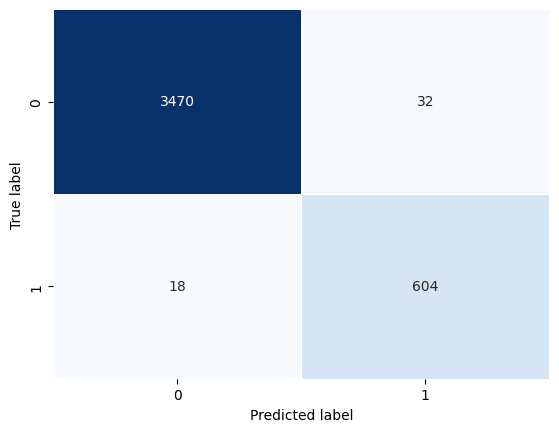

In [ ]:
import pandas as pd # Pour l'analyse et le traitement des données
import numpy as np # Pour le calcul numerique
import matplotlib.pyplot as plt # Pour la visualisation
import seaborn as sns # Pour la visualisation
from sklearn.cluster import KMeans # Pour la création du model
!pip install langdetect
from langdetect import detect
np.set_printoptions(precision=8)
plot_confusion_matrix(y_test, preds)

CNN-LSTM

In [ ]:
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from tensorflow.keras.layers import MaxPool1D
from keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D
print(X_train.shape)
n_epochs = 10
model = Sequential()
model.add(Dropout(0.25))
model.add(Conv1D(30,
                 5,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPool1D(pool_size=4))
model.add(LSTM(30))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



X_train = tf.cast(X_train, tf.float32)
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
result3 = model.fit(X_train, y_train, batch_size = 2, epochs=2, validation_split=0.2, verbose=1)
eval_ = model.evaluate(X_test, y_test)
print(eval_[0], eval_[1]) # loss / accuracy

plot_model(result3)

SyntaxError: invalid syntax (<ipython-input-43-60ca04392666>, line 13)

In [ ]:
model3.summary()
loss, accuracy = model3.evaluate(X_train , y_train , verbose=False)
#print("************************Results for class :"+str(curr_class)+"*********************")
print("Training Accuracy: {:.8f}".format(accuracy))
print("ok")
loss, accuracy = model3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.8f}".format(accuracy))

In [ ]:
# model.load_weights(filepath='SpamDetection.hdf')
import numpy as np
from tensorflow import keras
X_test = np.array(X_test)
y_test = np.array(y_test)
eval_ = model3.evaluate(X_test, y_test)
print(eval_[0], eval_[1]) # loss / accuracy

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : {:.7f}"+ str(format(acc_sc)))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [ ]:
preds = (model3.predict(X_test) > 0.5).astype("int32")

In [ ]:
c_report(y_test, preds)

In [ ]:
import pandas as pd # Pour l'analyse et le traitement des données
import numpy as np # Pour le calcul numerique
import matplotlib.pyplot as plt # Pour la visualisation
import seaborn as sns # Pour la visualisation
from sklearn.cluster import KMeans # Pour la création du model
!pip install langdetect
from langdetect import detect
np.set_printoptions(precision=8)
plot_confusion_matrix(y_test, preds)